<a href="https://colab.research.google.com/github/LuisSilvaS/Engenharia-de-Dados/blob/main/data_eng_test_version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

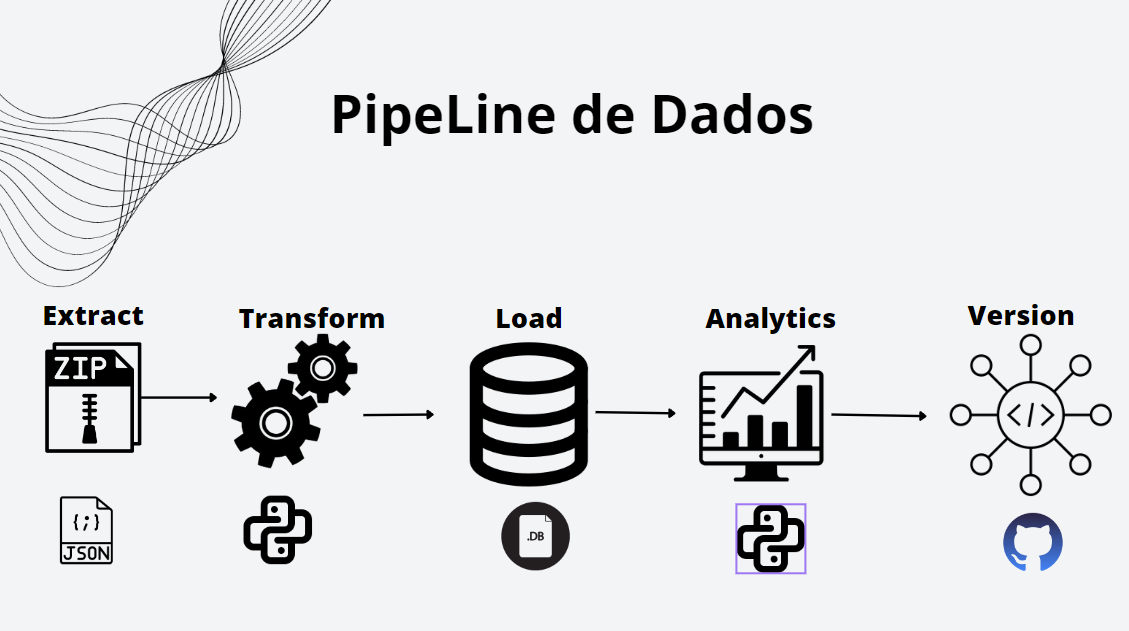

In [1]:
#Extract

In [2]:
import os
import json
import zipfile

# lista vazia para armazenar todos os dados
dados_totais = []

# caminho para o arquivo zip
caminho_zip = "/content/drive/MyDrive/Data-Eng-Test/datatest.zip"

# Open ZIP
with zipfile.ZipFile(caminho_zip) as zip_file:
    # Percorrendo todos os arquivos no arquivo ZIP
    for arquivo in zip_file.namelist():
        # Verificando se o arquivo é JSON
        if arquivo.endswith(".json"):
            # Open JSON
            with zip_file.open(arquivo) as f:
                # load JSON
                dados = json.load(f)
                # Adicionando os dados do arquivo à lista total
                dados_totais.append(dados)

In [ ]:
dados_totais

In [4]:
#Transform

In [5]:
import pandas as pd

# Transform a lista em um DataFrame do Pandas
df = pd.DataFrame(dados_totais)

In [ ]:
columns_to_remove = ["images", "marketplace", "variants", "reviews"]
df = df.drop(columns_to_remove, axis=1)

# Exiba as primeiras linhas do DataFrame após a remoção das colunas
print(df.head())

In [7]:
ds = df['assortment']

In [ ]:
# Cria um novo dataframe vazio para armazenar as informações desejadas
df_novo = pd.DataFrame(columns=['retailerPrice', 'manufacturerPrice', 'priceVariation', 'available', 'retailerTitle'])

# Converte a Series em um DataFrame
df = ds.to_frame(name='assortment')

# Percorre as linhas do dataframe original
for index, row in df.iterrows():
    # Obtém o valor da coluna 'assortment' da linha atual
    assortment = row['assortment']
    
    # Verifica se a lista não está vazia
    if assortment:
        # Obtém o primeiro dicionário da lista
        item = assortment[0]

        # Extrai as informações relevantes do dicionário
        retailer_price = item.get('retailerPrice')
        manufacturer_price = item.get('manufacturerPrice')
        price_variation = item.get('priceVariation')
        available = item.get('available')
        retailer_title = item.get('retailerTitle')

        # Cria um novo dicionário com as informações extraídas
        new_row = {
            'retailerPrice': retailer_price,
            'manufacturerPrice': manufacturer_price,
            'priceVariation': price_variation,
            'available': available,
            'retailerTitle': retailer_title
        }

        # Adiciona o novo dicionário como uma nova linha ao dataframe novo
        df_novo = df_novo.append(new_row, ignore_index=True)

# Exibe o dataframe novo
df_novo

In [9]:
# Ler o arquivo CSV
dt = df_novo

# Exibir o DataFrame
print(dt)

       retailerPrice manufacturerPrice priceVariation available  \
0                NaN               NaN            NaN     False   
1                NaN               NaN            NaN     False   
2                NaN               NaN            NaN     False   
3                NaN               NaN            NaN     False   
4                NaN               NaN            NaN     False   
...              ...               ...            ...       ...   
100965          None              None           None     False   
100966          None              None           None     False   
100967          None              None           None     False   
100968          7.49              7.51          -0.27      True   
100969          None              None           None     False   

                           retailerTitle  
0                                   None  
1                                   None  
2                                   None  
3                      

In [10]:
# Data Clear

In [14]:
# Exclui linhas com valores NaN
df_sem_nan = dt.dropna()

# Exibi o DataFrame sem linhas NaN
print(df_sem_nan)
df_sem_nan.to_csv('df_sem_nan.csv', sep=',', index=False)

       retailerPrice manufacturerPrice priceVariation available  \
17              15.9             17.59          -9.61      True   
20             38.99             39.76          -1.94      True   
25              7.99              6.75          18.37      True   
29             44.99             44.99              0      True   
38             32.99                 1           3199      True   
...              ...               ...            ...       ...   
100944         12.99              20.5         -36.63      True   
100950         11.99                 1           1099      True   
100956       2499.99              2499           0.04      True   
100963         17.99                 1           1699      True   
100968          7.49              7.51          -0.27      True   

                                            retailerTitle  
17      Absorvente Sempre Livre C/Aba Adapt Not l + p-...  
20                  Protetor Solar FPS 30 200ml - Sundown  
25             

In [15]:
#Load

In [16]:
import sqlite3
import pandas as pd
# Ler o arquivo CSV
df = pd.read_csv('/content/df_sem_nan.csv')

# Excluir linhas com valores NaN
df_not_null = df.dropna()

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('database.db')

# Salvar o DataFrame em uma tabela no banco de dados
df_not_null.to_sql('nome_da_tabela', conn, if_exists='replace', index=False)

# Fechar a conexão com o banco de dados
conn.close()

In [17]:
#Analytics

In [18]:
# Conectar ao banco de dados SQLite
conn = sqlite3.connect('database.db')

# Consultar a tabela desejada
query = "SELECT * FROM nome_da_tabela"
dx = pd.read_sql_query(query, conn)

# Exibir o DataFrame com o conteúdo da tabela
print(dx)

# Fechar a conexão com o banco de dados
conn.close()

       retailerPrice  manufacturerPrice  priceVariation  available  \
0              15.90              17.59           -9.61          1   
1              38.99              39.76           -1.94          1   
2               7.99               6.75           18.37          1   
3              44.99              44.99            0.00          1   
4              32.99               1.00         3199.00          1   
...              ...                ...             ...        ...   
19974          12.99              20.50          -36.63          1   
19975          11.99               1.00         1099.00          1   
19976        2499.99            2499.00            0.04          1   
19977          17.99               1.00         1699.00          1   
19978           7.49               7.51           -0.27          1   

                                           retailerTitle  
0      Absorvente Sempre Livre C/Aba Adapt Not l + p-...  
1                  Protetor Solar FPS 30 

In [31]:

# Ordenar o DataFrame pela coluna "priceVariation" em ordem decrescente e obter os 10 produtos com maior variação de preço
top_variations = dx.nlargest(1000, 'priceVariation')

# Ordenar o DataFrame pela coluna "available" em ordem crescente e obter os 10 produtos com maior indisponibilidade
top_unavailable = dx.nsmallest(10, 'available')

# Exibir os resultados
print("Top 10 produtos com maior variação de preço:")
print(top_variations)

print("\nTop 10 produtos com maior indisponibilidade:")
print(top_unavailable)

Top 10 produtos com maior variação de preço:
       retailerPrice  manufacturerPrice  priceVariation  available  \
2897         2845.00                1.0        284400.0          1   
6573         2845.00                1.0        284400.0          1   
7096         2845.00                1.0        284400.0          1   
9095         2845.00                1.0        284400.0          1   
9133         2845.00                1.0        284400.0          1   
...              ...                ...             ...        ...   
14918          26.99                1.0          2599.0          1   
14941          26.99                1.0          2599.0          1   
14944          26.99                1.0          2599.0          1   
15029          26.99                1.0          2599.0          1   
15082          26.99                1.0          2599.0          1   

                                           retailerTitle  
2897   Notebook Lenovo Ultrafino Ideapad 3i I3-10110u..

In [32]:
top_variations

,retailerPrice,manufacturerPrice,priceVariation,available,retailerTitle
2897,2845.00,1.0,284400.0,1,Notebook Lenovo Ultrafino Ideapad 3i I3-10110u...
6573,2845.00,1.0,284400.0,1,Notebook Lenovo Ultrafino Ideapad 3i I3-10110u...
7096,2845.00,1.0,284400.0,1,Notebook Lenovo Ultrafino Ideapad 3i I3-10110u...
9095,2845.00,1.0,284400.0,1,Notebook Lenovo Ultrafino Ideapad 3i I3-10110u...
9133,2845.00,1.0,284400.0,1,Notebook Lenovo Ultrafino Ideapad 3i I3-10110u...
...,...,...,...,...,...
14918,26.99,1.0,2599.0,1,Fralda pampers confort sec XXG/16un
14941,26.99,1.0,2599.0,1,Fralda Pampers Pants Ajuste Total P 26 unidades
14944,26.99,1.0,2599.0,1,Fraldas Pampers Supersec XG - 22 Unidades
15029,26.99,1.0,2599.0,1,Fralda Pampers Descartável Confort Sec P - 28 ...


In [33]:
#Produtos com a maior variação de preço

In [34]:
# Agrupando o DataFrame pelo nome do produto e calculando a variação de preço máxima para cada grupo
grouped = dx.groupby('retailerTitle')['priceVariation'].max()

# Ordenando os grupos em ordem decrescente com base na variação de preço
sorted_groups = grouped.sort_values(ascending=False)

# 10 primeiros grupos com a maior variação de preço
top_10_variations = sorted_groups.head(10)

# Transforma top_10_variations em um DataFrame

df_top_10_variations = top_10_variations.to_frame().reset_index()

# Renomeia as colunas do DataFrame
df_top_10_variations.columns = ['retailerTitle', 'maxPriceVariation']

# Exiba os resultados
df_top_10_variations

,retailerTitle,maxPriceVariation
0,Notebook Lenovo Ultrafino Ideapad 3i I3-10110u...,284400.00
1,Home Theater LG LHB655NW Bluetooth 1000W com 5...,249899.00
2,"Smart TV 43"" Led Semp Roku R5500 FHD Wifi Dual...",240911.00
3,"Smart TV LED 50"" Semp 50RK8500 RokuUHD HDR Wif...",239899.00
4,Absorvente Intimus Sport Super com Aplicador -...,179800.00
5,Home Theater LG LHB645N Bluetooth 1000W com 5....,169899.00
6,Smart TV LED 32” HD Semp R5500 VA Wi-Fi 3 HDMI...,129899.00
7,NIVEA Sabonete Líquido Íntimo Suave 250ml,12598.35
8,Fralda Pampers Pants Ajuste Total xxg 60 unidades,11699.00
9,Fralda Pampers Pants Ajuste Total M 84 unidades,11034.00


In [35]:
#Produtos que apresentam maior indisponibilidade

In [36]:
top_unavailable

,retailerPrice,manufacturerPrice,priceVariation,available,retailerTitle
0,15.90,17.59,-9.61,1,Absorvente Sempre Livre C/Aba Adapt Not l + p-...
1,38.99,39.76,-1.94,1,Protetor Solar FPS 30 200ml - Sundown
2,7.99,6.75,18.37,1,Beb castanha caju original 200ML atdc
3,44.99,44.99,0.00,1,Fralda Huggies Tripla Proteção G - 36 Fraldas
4,32.99,1.00,3199.00,1,Fralda Pampers Supersec Pacotão G - 26 Unidades
5,9.99,7.40,35.00,1,Absorvente Externo Intimus Tripla Proteção Sua...
6,249.60,289.00,-13.63,1,Ferro a Vapor Arno Ultragliss I FUA1 Azul - 220v
7,9.99,17.99,-44.47,1,NIVEA Men Desodorante Antitranspirante Aerosol...
8,2.19,2.19,0.00,1,Cappuccino 3 Corações Chocolate Sachê 20 G
9,19.99,18.87,5.94,1,Bebida Orgânica de Castanha de Caju e Coco 1L ...


In [37]:
# Visualization

In [ ]:
import matplotlib.pyplot as plt

grouped = df.groupby('retailerTitle')['priceVariation'].max()

# Ordenando os grupos em ordem decrescente com base na variação de preço
sorted_groups = grouped.sort_values(ascending=False)

# Selecionando os 10 primeiros grupos com a maior variação de preço
top_10_variations = sorted_groups.head(10)

# Cria o gráfico de barras horizontais
plt.barh(top_10_variations.index, top_10_variations.values)

# Adiciona rótulos e título ao gráfico
plt.xlabel('Variação de Preço')
plt.ylabel('Produto')
plt.title('Top 10 Produtos com Maior Variação de Preço')

# Exibe o gráfico
plt.show()

In [ ]:
import matplotlib.pyplot as plt

top_unavailable.plot.barh(x='retailerTitle', y='retailerPrice')

# Adiciona rótulos e título ao gráfico
plt.xlabel('retailerPrice')
plt.ylabel(' ')
plt.title('Top 10 produtos com maior indisponibilidade:')

# Exibe o gráfico
plt.show()